In [ ]:
import pandas as pd

# Define the data for the table
data = [
    ["Beplex Forte 50 tablets Advance Boost", "50", "Stomach ache due to heat"],
    ["Crocin / Dolo 650", "10", "Body pain, headache (May cause drowsiness)"],
    ["SamⓇ cold(gives drowsiness)", "10", "blocked nose, running nose, sneezing, fever"],
    ["Cetirizine", "10", "Running nose, blocked nose, sneezing, watery eyes (Used for food allergies, insect bites, and stings)"],
    ["Zofer tablet", "2", "Prevent nausea, vomiting"],
    ["Roko", "", "Loose motion, anti-diarrhea"],
    ["Adhesive to Band Aid", "", ""],
    ["Vicks VapoRub", "", ""],
    ["Zinda Tilismoth", "2", "Cold, cough, throat pain, body pain, stomach disorders, tooth pain"],
    ["Borro plus Ayurvedic Antiseptic Coam", "", "Cures dry skin diseases, cuts, scratches, minor burns, wounds, chapped skin"],
    ["Betamethasone Valerate skin Cream", "2", "Eczema, contact dermatitis, allergies, rashes, swelling"],
    ["Amrutanjan", "2", "Back pain"],
    ["Iodex", "1", "Neck pain, back pain, joint pain, sprains"],
    ["steam Inhalor", "", ""],
    ["Crocin Pain Relief", "10", "Headache, migraine, toothache"],
    ["Digene", "10 tablets", "Acidity and indigestion"],
    ["Pudin Hara", "2", "Bloating, indigestion, flatulence, and stomach discomfort"],
    ["Rantac 150", "2", "Prevent heartburn, stomach ulcer, reflux disease"],
    ["Erythromycin (Erythrocin 250)", "10 tablets", "Bacterial infection (throat and sinus, eye, ear, and mouth infection)"],
    ["Montek LC", "", "Allergic conditions (hay fever, dust allergies, nettle rash)"],
    ["Strepsil", "2 tablets", "Sore throat, common cough"],
    ["Brufen - 400", "11", "Osteoarthritis, joint pain, reduced movement of joints, back pain, sprained muscles, dental pain, headache"],
    ["Clove oil", "", "Remedy for toothache"]
]

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["Medicine Name", "Quantity", "Symptoms"])

# Export the DataFrame to an Excel file
df.to_excel("MedicineTable.xlsx", index=False)


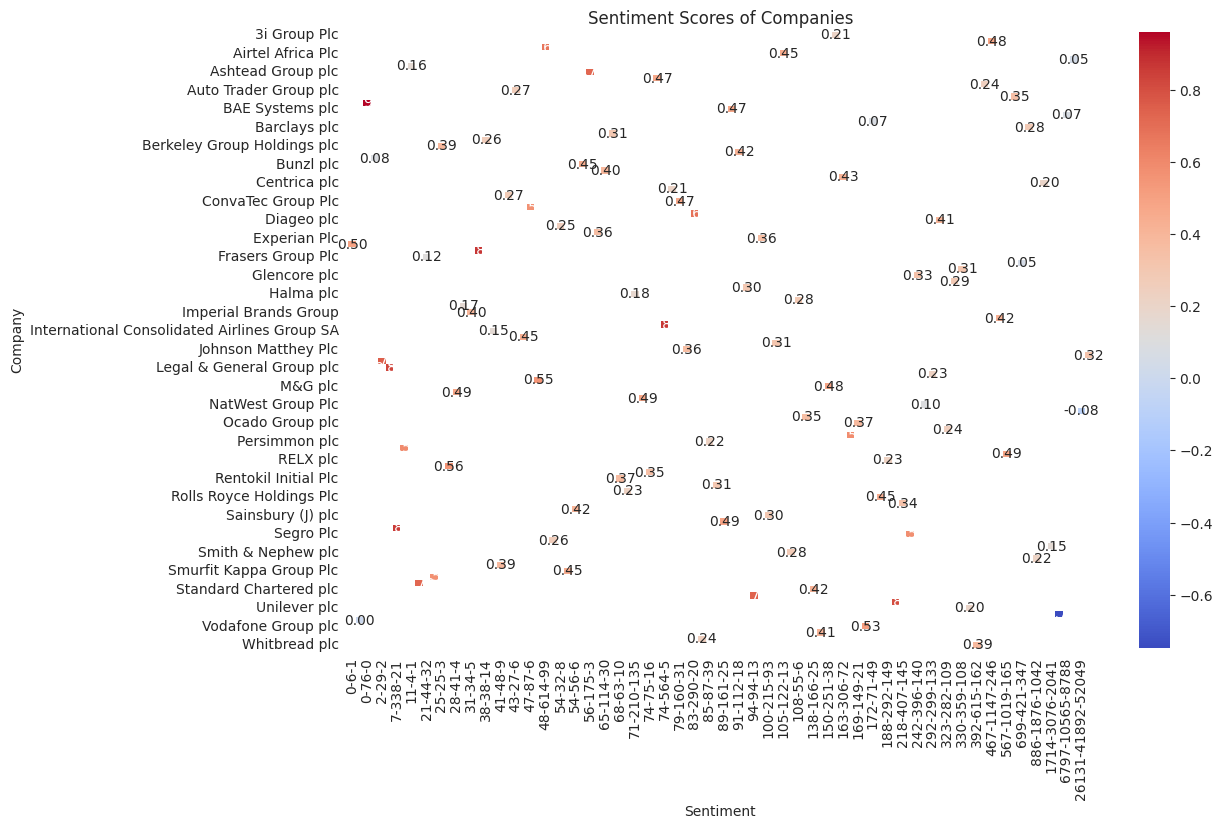

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel sheet
data = pd.read_excel('/content/COMPANY CODE_SENTIMENT SCORES_HEATMAP.xlsx')

# Pivot the data to create a pivot table with sentiment scores as values
# and companies as rows and columns
pivot_table = pd.pivot_table(data, values='SENTIMENT SCORES', index='COMPANY NAMES', columns=['NEUTRAL', 'POSITIVE', 'NEGATIVE'])

# Set the style of the plot
sns.set_style('white')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')

# Set the title and axis labels
plt.title('Sentiment Scores of Companies')
plt.xlabel('Sentiment')
plt.ylabel('Company')

# Show the plot
plt.show()


In [ ]:
!pip install snscrape
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 3.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
companies=['Berkeley Group Holdings plc','Experian Plc','Shell plc']

In [ ]:
#FTSE 100 stocks
import requests
from bs4 import BeautifulSoup
url = 'https://www.fidelity.co.uk/shares/ftse-100/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
companies=[]
# Find the table containing the company names
table = soup.find('tbody')
# for t in table:
#   company=t.find('td','a')
#   print(company)
#   # companies.append(company)
# # Find all the rows in the table except for the header row
rows = table.findAll('tr')[0]

# # Extract the company name from each row and store in a list
companies = [row.findAll('td')[1].text for row in rows]

# # Print the list of company names
print(companies)

AttributeError: ignored

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter

# Set the search query
search_query = 'lang:en since:2022-01-01 until:2023-02-05'

# Create an empty list to store the scraped tweets
tweets_list = []

# Loop through each company name in the list
for company in companies:
    # Add the company name to the search query
    query = search_query + f' {company}'

    # Use snscrape to get the tweets containing the search query
    for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        # Extract the tweet, comments, and retweets from the tweet object
        text = tweet.content
        comments = tweet.replyCount
        retweets = tweet.retweetCount
        date = tweet.date.date().strftime('%Y-%m-%d')
        company_name = company

        # Add the data to the tweets list
        tweets_list.append([company_name, date, text, comments, retweets])

# Create a pandas dataframe from the list of scraped tweets
tweets_df = pd.DataFrame(tweets_list, columns=['company_name', 'date', 'tweet', 'comments', 'retweets'])

# Print the first 10 rows of the dataframe
print(tweets_df.head(10))
tweets_df.to_csv('ftse100_admiral.csv',index=False)

<ipython-input-3-63d653dc8f65>:18: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  text = tweet.content


                  company_name        date  \
0  Berkeley Group Holdings plc  2023-02-02   
1  Berkeley Group Holdings plc  2023-01-28   
2  Berkeley Group Holdings plc  2023-01-25   
3  Berkeley Group Holdings plc  2023-01-19   
4  Berkeley Group Holdings plc  2023-01-17   
5  Berkeley Group Holdings plc  2023-01-17   
6  Berkeley Group Holdings plc  2023-01-16   
7  Berkeley Group Holdings plc  2023-01-14   
8  Berkeley Group Holdings plc  2023-01-02   
9  Berkeley Group Holdings plc  2022-12-31   

                                               tweet  comments  retweets  
0  Berkeley Group Holdings Plc. PT Raised to GBP4...         0         0  
1  Jefferies Financial Group Comments on The Berk...         0         0  
2  Is The Recovery in Berkeley Group Holdings PLC...         0         0  
3  The Berkeley Group Holdings plc $BKGFY Short I...         0         0  
4  THE BERKELEY GROUP HOLDINGS PLC (#BKG): +10.1%...         0         0  
5  UK large cap stocks\n\nWant to know the 

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://tradebrains.in/nifty-50-companies-list/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
companies=[]
# Find the table containing the company names
table = soup.find('tbody', class_="row-hover").find_all('tr')
# for t in table:
#   company=t.find('td','a')
#   print(company)
#   # companies.append(company)
# # Find all the rows in the table except for the header row
# rows = table.find('tr',class_="row-").find
for row in table:
  company = row.find('td',class_="column-1").text
  companies.append(company)
# # Print the list of company names
print(companies)


['Bharti Airtel Ltd.', 'Adani Ports and Special Economic Zone Ltd.', 'NTPC Ltd.', 'Power Grid Corporation of India Ltd.', 'Reliance Industries Ltd.', 'Oil & Natural Gas Corporation Ltd.', 'Coal India Ltd.', 'Bharat Petroleum Corporation Ltd.', 'Adani Enterprises Ltd.', 'Tata Steel Ltd.', 'JSW Steel Ltd.', 'Hindalco Industries Ltd.', 'Infosys Ltd.', 'Tata Consultancy Services Ltd.', 'HCL Technologies Ltd.', 'Tech Mahindra Ltd.', 'Wipro Ltd.', 'Sun Pharmaceutical Industries Ltd.', 'Cipla Ltd.', "Dr. Reddy's Laboratories Ltd.", "Divi's Laboratories Ltd.", 'Apollo Hospitals Enterprise Ltd.', 'HDFC Bank Ltd.', 'ICICI Bank Ltd.', 'Housing Development Finance Corporation Ltd.', 'Kotak Mahindra Bank Ltd.', 'State Bank of India', 'Bajaj Finance Ltd.', 'Axis Bank Ltd.', 'Bajaj Finserv Ltd.', 'IndusInd Bank Ltd.', 'SBI Life Insurance Company Ltd.', 'HDFC Life Insurance Company Ltd.', 'ITC Ltd.', 'Hindustan Unilever Ltd.', 'Nestle India Ltd.', 'Tata Consumer Products Ltd.', 'Britannia Industries L

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools

# List of company names

# Search terms to look for in tweets
search_terms = ['FTSE 100','stock market', 'investing', 'stocks', 'equities', 'portfolio', 'trading', 'day trading', 'swing trading', 'long-term investing', 'fundamental analysis', 'technical analysis', 'stock picks', 'dividends', 'stock options', 'market trends', 'market news', 'earnings reports', 'economic indicators', 'value investing', 'growth investing', 'ETFs', 'mutual funds', 'index funds', 'risk management']


# Date range for tweets to scrape
start_date = '2006-01-01'
end_date = '2023-02-05'

# List to store scraped tweets
tweets_list = []

# Iterate over all possible combinations of company names and search terms
for company, search_term in itertools.product(companies, search_terms):
    # Construct query string
    query = f'{search_term} near:"United Kingdom" within:15mi since:{start_date} until:{end_date} from:{company}'

    # Use snscrape to scrape tweets based on query
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        # Check if the tweet is a retweet and extract the retweet content if so
        if 'retweeted_status' in tweet._json:
            retweet_content = tweet._json['retweeted_status']['text']
        else:
            retweet_content = ''

        # Check if the tweet is a reply and extract the reply content if so
        if tweet.inReplyToUser:
            reply_content = tweet.inReplyToTweet.content
        else:
            reply_content = ''

        # Append the scraped tweet to the list
        tweets_list.append([company, search_term,tweet.date, tweet.content, retweet_content, reply_content])

# Create a pandas dataframe from the list of scraped tweets
tweets_df = pd.DataFrame(tweets_list, columns=['Company', 'Search Term','Date', 'Tweet Content', 'Retweet Content', 'Reply Content'])
tweets_df.to_csv('ftse_investing_tweets1.csv', index=False)
# Print the dataframe
print(tweets_df.head())


Empty DataFrame
Columns: [Company, Date, Tweet Content, Retweet Content, Reply Content]
Index: []


In [ ]:
import pandas as pd
tables=pd.read_html('https://tradebrains.in/nifty-50-companies-list/')
len(tables)

1

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import csv

# API keys and access tokens
consumer_key = "9pKoEBs5N5uNULKE3QIJZ0UHI"
consumer_secret = "eEvIqX0G80yM218QLK4KxWBZx1KFzIpP4KtpHVt5i2dg1JIqYB"
access_token = "1544027264156934152-gFtXmXq1B5OAIGOXsrTl4cBagkUqRe"
access_token_secret = "2EDjPrLm0xXlV0EexMLo7TKK0ubDqMR4JHPJlxprX0OF8"

# Authenticate using your API keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Search for tweets containing the term 'FTSE 100'
tweets = tweepy.Cursor(api.search,
              q='FTSE 100',
              tweet_mode='extended',
              lang='en',
              since_id='2022-01-01',
              until='2023-02-02').items()

# Open a CSV file for writing
with open('FTSE100_tweets.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)

    # Write the header row to the CSV file
    writer.writerow(['id', 'created_at', 'text'])

    # Loop through the tweets
    for tweet in tweets:
        # Write the tweet data to the CSV file
        writer.writerow([tweet.id, tweet.created_at, tweet.full_text])


TweepError: ignored

In [ ]:
import tweepy
import csv
import re
from datetime import datetime, timedelta

# API keys and access tokens
consumer_key = "6ORMfMECoF3CJOFTXZnK3lBly"
consumer_secret = "5CmEapyQaAUXSNQXQLwJUcarz2mp8ELcC8a0enkQr73Ay4Jwxr"
access_token = "1544027264156934152-rvjKWkQRLvOtp84MRsuR60lEtfwiJI"
access_token_secret = "TLvpB1DqrDMjrI6ciKWOiKlC0S5VEiGI8c1yasjmBvChm"

# Authenticate using your API keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Define the start and end dates for the search
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 2, 2)

# Define the list of 100 specific FTSE 100 companies
companies = ["3i Group Plc", "Abrdn plc","Admiral Group","	Anglo American","Antofagasta Holdings","Ashtead Group plc","Associated British Foods plc","AstraZeneca plc","Auto Trader Group plc","Avast plc","AVEVA Group plc","Aviva plc","B&M European Value Retail SA","BAE Systems plc","Barclays plc","Barratt Developments plc","Berkeley Group Holdings plc","BHP Group Plc","BP Plc","British American Tobacco plc","British Land Co plc","BT Group plc","Bunzl plc","Burberry Group plc","Coca-Cola HBC AG","Compass Group plc","CRH plc","Croda International plc","DCC plc","Dechra Pharmaceuticals plc","Diageo plc","Electrocomponents plc","Entain plc","Evraz plc","Experian Plc","Ferguson plc","Flutter Entertainment","Fresnillo","GlaxoSmithKline plc","Glencore plc","Halma plc","Hargreaves Lansdown plc","Hikma Pharmaceuticals","HSBC Holdings plc","Imperial Brands Group","Informa plc","InterContinental Hotels Group plc","Intermediate Capital Group plc","International Consolidated Airlines Group SA","Intertek Group plc"]

# Create the search query by joining the names of the 100 companies with the OR operator
search_query = ' OR '.join(companies) + ' FTSE 100'

# Search for tweets containing the search query
tweets = tweepy.Cursor(api.search,
              q=search_query,
              tweet_mode='extended',
              lang='en',
              count=100,
              since_id=start_date,
              until=end_date,
              include_rts=True).items()

# Open a CSV file for writing
with open('FTSE100_tweets.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)

    # Write the header row to the CSV file
    writer.writerow(['Date', 'Company Name', 'Tweet'])

    # Loop through the tweets
    for tweet in tweets:
        # Extract the company name and tweet text from the tweet
        company_name = [company for company in companies if company in tweet.full_text][0]
        tweet_text = tweet.full_text

        # Write the date, company name, and tweet to the CSV file
        writer.writerow([tweet.created_at, company_name, tweet_text])


TweepError: ignored

In [ ]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df=pd.read_csv('/content/ftse100_admiral.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(df)
tweet_list_df = pd.DataFrame(tweet_list_df['tweet'])
tweet_list_df.head(5)

,tweet
0,Berkeley Group Holdings Plc. PT Raised to GBP4...
1,Jefferies Financial Group Comments on The Berk...
2,Is The Recovery in Berkeley Group Holdings PLC...
3,The Berkeley Group Holdings plc $BKGFY Short I...
4,THE BERKELEY GROUP HOLDINGS PLC (#BKG): +10.1%...


In [ ]:
import re

def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    # Check if input is a string
    if isinstance(sen, str):
        sentence = sen.lower()

        # Remove RT
        sentence = re.sub('RT @\w+: '," ", sentence)

        # Remove special characters
        sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        return sentence

    else:
        return ''


In [ ]:
cleaned_tweets = []

for tweet in tweet_list_df['tweet']:
  if isinstance(tweet, str) and tweet.strip() != '':
      cleaned_tweet = preprocess_tweet(tweet)
      cleaned_tweets.append(cleaned_tweet)


In [ ]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,tweet,cleaned
0,Berkeley Group Holdings Plc. PT Raised to GBP4...,berkeley group holdings plc pt raised to gbp40...
1,Jefferies Financial Group Comments on The Berk...,jefferies financial group comments on the berk...
2,Is The Recovery in Berkeley Group Holdings PLC...,is the recovery in berkeley group holdings plc...
3,The Berkeley Group Holdings plc $BKGFY Short I...,the berkeley group holdings plc bkgfy short in...
4,THE BERKELEY GROUP HOLDINGS PLC (#BKG): +10.1%...,the berkeley group holdings plc bkg 10 1


In [ ]:
# Calculate sentiment scores for each tweet
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

# Print the first 5 rows of the dataframe
print(tweet_list_df.head(5))
tweet_list_df.to_csv("sentiment_scores_admiral.csv", index=False)

                                               tweet  \
0  Berkeley Group Holdings Plc. PT Raised to GBP4...   
1  Jefferies Financial Group Comments on The Berk...   
2  Is The Recovery in Berkeley Group Holdings PLC...   
3  The Berkeley Group Holdings plc $BKGFY Short I...   
4  THE BERKELEY GROUP HOLDINGS PLC (#BKG): +10.1%...   

                                             cleaned  polarity  subjectivity  \
0  berkeley group holdings plc pt raised to gbp40...       0.0           0.0   
1  jefferies financial group comments on the berk...       0.0           0.0   
2  is the recovery in berkeley group holdings plc...       0.2           0.2   
3  the berkeley group holdings plc bkgfy short in...       0.0           0.3   
4          the berkeley group holdings plc bkg 10 1        0.0           0.0   

  sentiment  neg  neu  pos  compound  
0   neutral  0.0  1.0  0.0    0.0000  
1   neutral  0.0  1.0  0.0    0.0000  
2   neutral  0.0  1.0  0.0    0.0000  
3  positive  0.0  0.8  0.2

In [ ]:
tweet_list_df['cleaned'] = tweet_list_df['tweet'].apply(preprocess_tweet)

# Calculate sentiment scores for each tweet
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

for index, row in tweet_list_df.head(354013)['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

# Save the results to a CSV file
tweet_list_df.head(354013).to_csv("sentiment_scores.csv", index=False)

In [ ]:
!pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


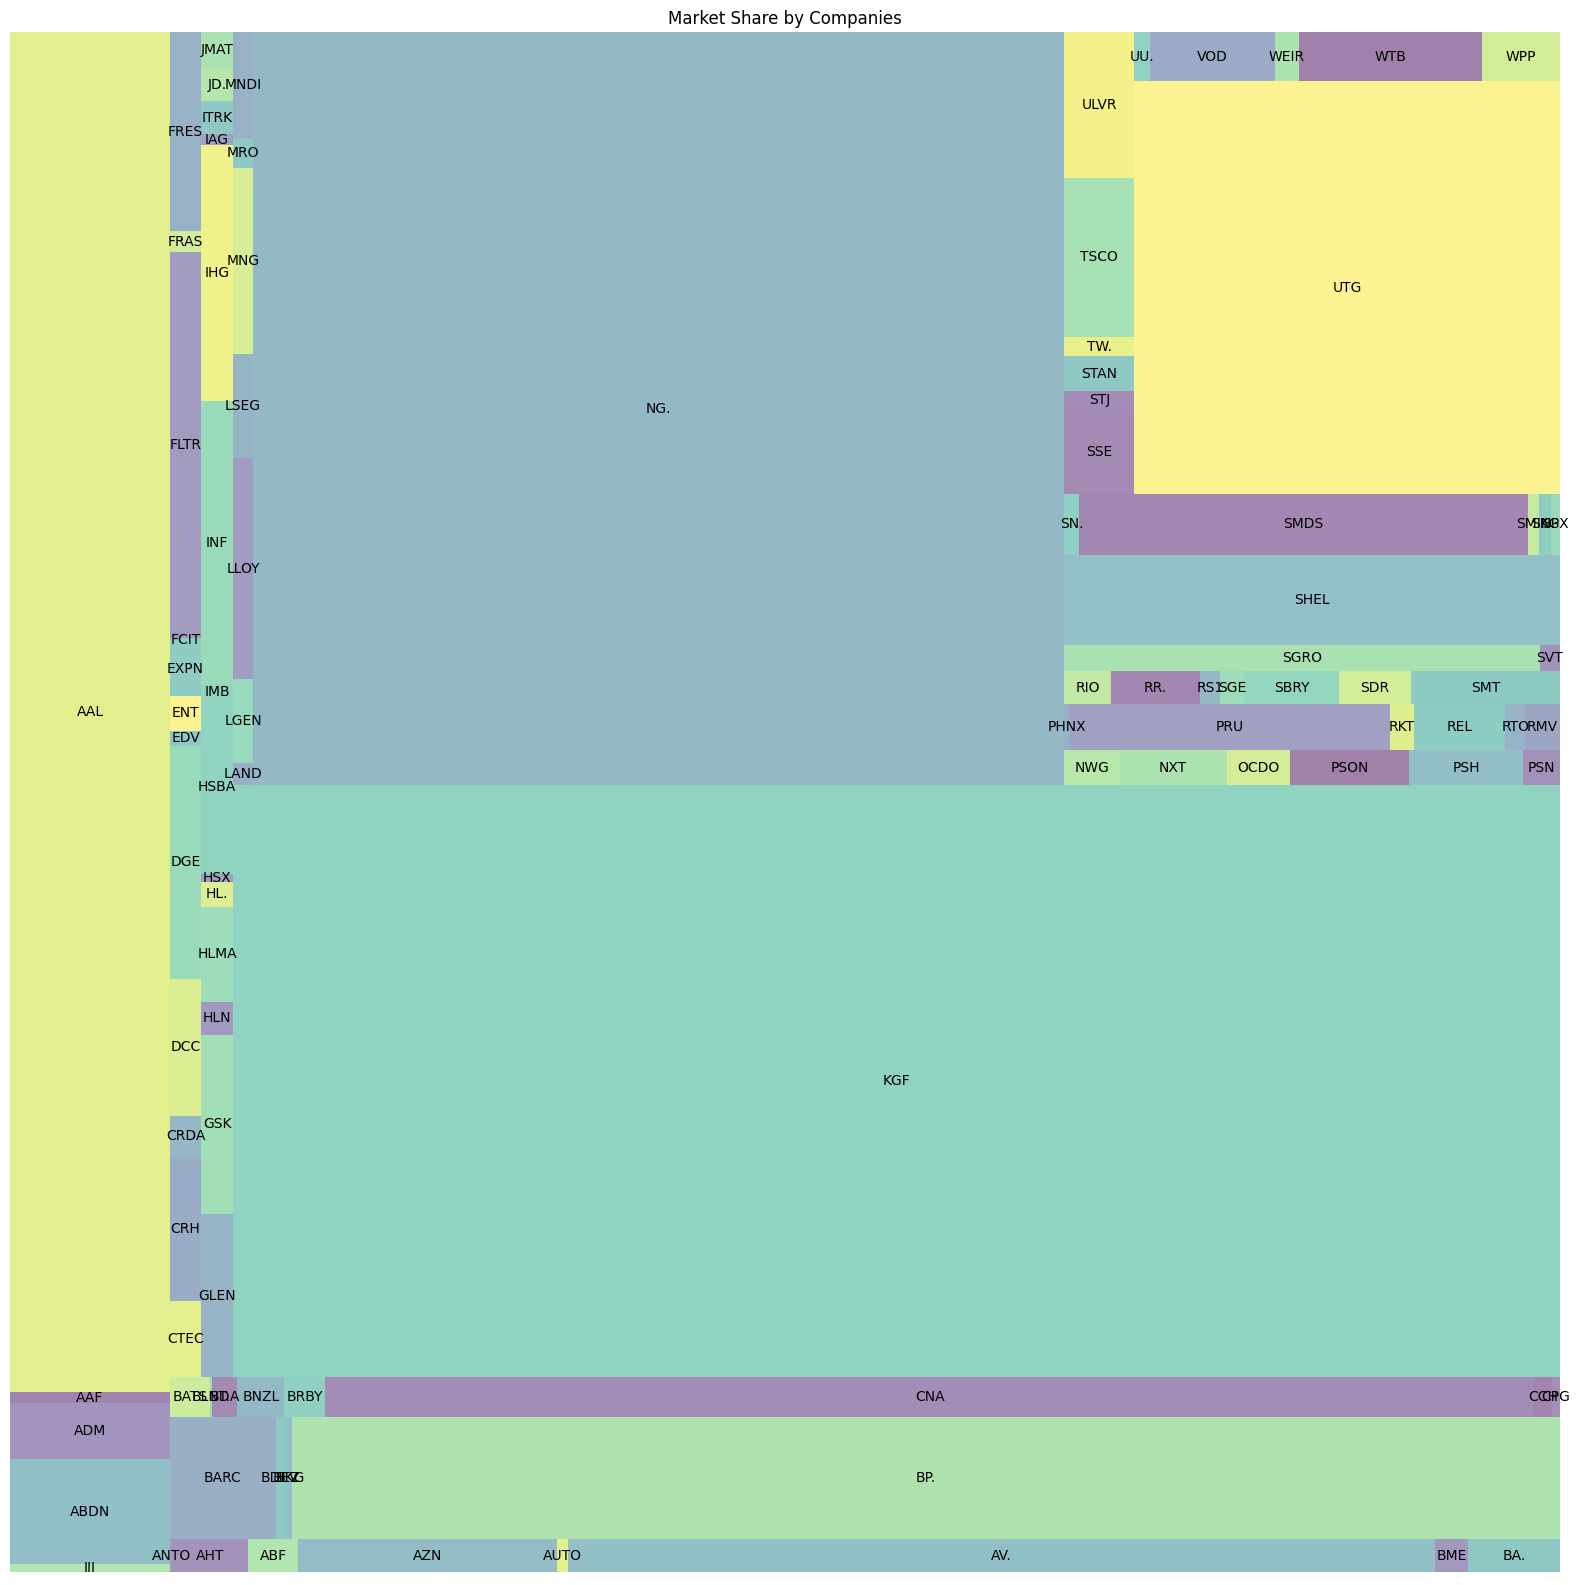

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load the data from the Excel sheet
data = pd.read_excel('/content/COMPANY CODE_SENTIMENT SCORES_HEATMAP.xlsx')

# Create a treemap using squarify
plt.figure(figsize=(20, 20))
squarify.plot(sizes=data['POSITIVE'], label=data['COMPANY CODE'], alpha=0.5)
plt.axis('off')

# Set the title
plt.title('Market Share by Companies')

# Show the plot
plt.show()


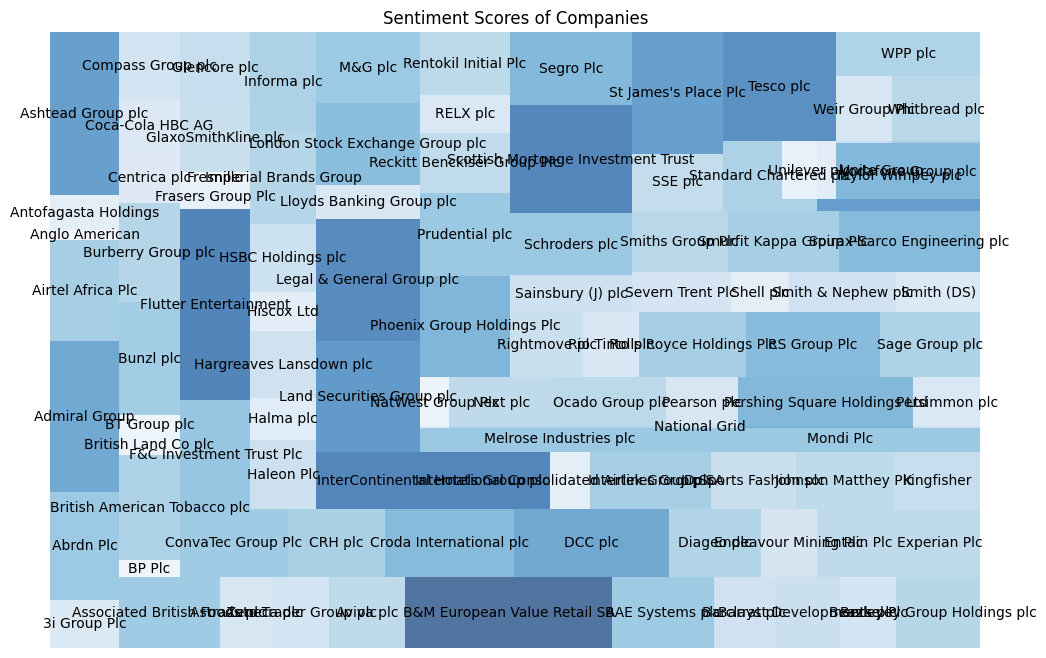

In [ ]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# Load the data from the Excel sheet
data = pd.read_excel('/content/COMPANY CODE_SENTIMENT SCORES_HEATMAP.xlsx')

# Filter out rows with zero sentiment scores
data = data[data['SENTIMENT SCORES'] != 0]

# Define the sizes, labels, and color scale for the treemap
sizes = data['SENTIMENT SCORES']
labels = data['COMPANY NAMES']
color_scale = plt.cm.Blues

# Create a treemap using squarify
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=color_scale(sizes), alpha=0.7)
plt.axis('off')
plt.title('Sentiment Scores of Companies')

plt.show()
